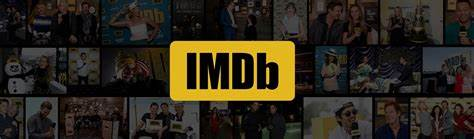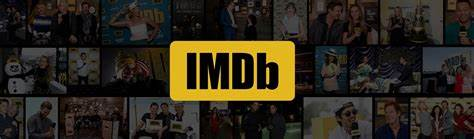

 **Introduction for IMDb Sentiment Analysis with RNN**

 
Title: Sentiment Analysis on IMDb Movie Reviews Using Recurrent Neural Networks (RNN)

Introduction:
This project aims to perform sentiment analysis on IMDb movie reviews, which involves classifying each review as either positive or negative based on the emotional tone conveyed in the text. Sentiment analysis is a popular application in Natural Language Processing (NLP), where machine learning models learn from text data to predict the sentiment behind words, phrases, or entire reviews.

Using Recurrent Neural Networks (RNN), which are especially suited for sequential data, the model will analyze the sentiment of movie reviews from IMDb. RNNs are effective for this task because they maintain information about previous words in the sequence, which helps in understanding context—crucial for sentiment analysis. This IMDb dataset, containing user reviews with corresponding positive or negative labels, will serve as the training and testing ground for the model.

**Importing necessery libraries**

In [107]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns

**Load data**

In [ ]:
import pandas as pd
df=pd.read_csv("IMDB.csv")

**Display data**

In [111]:
df

text  label
0     I always wrote this series off as being a comp...      0
1     1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...      0
2     This movie was so poorly written and directed ...      0
3     The most interesting thing about Miryang (Secr...      1
4     when i first read about "berlin am meer" i did...      0
...                                                 ...    ...
4995  This is the kind of picture John Lassiter woul...      1
4996  A MUST SEE! I saw WHIPPED at a press screening...      1
4997  NBC should be ashamed. I wouldn't allow my chi...      0
4998  This movie is a clumsy mishmash of various gho...      0
4999  Formula movie about the illegitimate son of a ...      0

[5000 rows x 2 columns]

**Data Analysis**

In [113]:
df.shape

(5000, 2)

In [115]:
df.size

10000

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   label   5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.3+ KB


In [119]:
for i in df.columns:
    print(df[i].value_counts())

text
This movie starts off somewhat slowly and gets running towards the end. Not that that is bad, it was done to illustrate character trait degression of the main character. Consequently, if you are not into tragedies, this is not your movie. It is the thought provoking philosophy of this movie that makes it worthwhile. If you liked Dostoyevsky's 'Crime and Punishment," you will probably like this if only for the comparisons. The intriguing question that the movie prompts is, "What is it that makes a renowned writer completely disregard his publicly-aproved ideas for another set?" The new ideas are quite opposed to the status quo-if you are a conservative you will not like this movie. <br /><br />Besides other philosophical questions, I must admit that the movie was quite aesthetically pleasing as well. The grassy hillsides and beautiful scenery helped me get past the slow start. Also, there was use of coloric symbolism in representing the mindstate of the main characters. If these so

In [121]:
for i in df.columns:
    print(df[i].unique())

['I always wrote this series off as being a complete stink-fest because Jim Belushi was involved in it, and heavily. But then one day a tragic happenstance occurred. After a White Sox game ended I realized that the remote was all the way on the other side of the room somehow. Now I could have just gotten up and walked across the room to get the remote, or even to the TV to turn the channel. But then why not just get up and walk across the country to watch TV in another state? "Nuts to that", I said. So I decided to just hang tight on the couch and take whatever Fate had in store for me. What Fate had in store was an episode of this show, an episode about which I remember very little except that I had once again made a very broad, general sweeping blanket judgment based on zero objective or experiential evidence with nothing whatsoever to back my opinions up with, and once again I was completely right! This show is a total crud-pie! Belushi has all the comedic delivery of a hairy lighth

In [122]:
df.isnull().any()

text     False
label    False
dtype: bool

In [123]:
x=df['text']
y=df['label']

In [124]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4995    1
4996    1
4997    0
4998    0
4999    0
Name: label, Length: 5000, dtype: int64

In [125]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=10)

In [126]:
import re

def normalize(data):
    normalized = []
    
    for i in data:
        i = i.lower()
        # Get rid of urls
        i = re.sub('https?://\\S+|www\\.\\S+', '', i)
        # Get rid of non-word characters, including '!' mark
        i = re.sub('[!]', '', i)  # Removing the exclamation mark explicitly
        i = re.sub('\\W', ' ', i)
        i = re.sub('\n', '', i)
        i = re.sub(' +', ' ', i)
        i = re.sub('^ ', '', i)
        i = re.sub(' $', '', i)
        normalized.append(i)
    return normalized

x_train = normalize(xtrain)
x_test = normalize(xtest)


In [127]:
x_train

['i can t imagine why it hasn t been theatrically released yet it s got a great ensemble cast with sutherland lane and especially chris evans doing spectacular work wake up studio execs br br the story is based upon the experiences of the author screenwriter growing up as the poor kid in an extremely affluent community where class is everything and makes a difference in every aspect of life from clothing to justice br br during the film s q a the author was asked about his experiences and particularly what we don t know about the ultra rich he said they aren t stupid they re very smart as opposed to how they may portray themselves they ve got plans and they are a threat br br in many ways this film is extremely timely',
 'russell my fav is gorgeous in this film but more than that the film covers a tremendous range of human passion and sorrow everything from marriage to homosexuality is addressed and respected the film makes the viewer realize that tolerance of other humans provides the

In [128]:
max_vocab=10000
tokenizer=Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(x_train)

In [129]:
#tokenize the text into vectors
x_train=tokenizer.texts_to_sequences(x_train)
x_test=tokenizer.texts_to_sequences(x_test)


In [130]:
x_train

[[10,
  50,
  23,
  707,
  133,
  9,
  1435,
  23,
  77,
  682,
  239,
  9,
  13,
  196,
  2,
  82,
  2854,
  177,
  16,
  2038,
  1513,
  3,
  286,
  1264,
  4132,
  444,
  2039,
  162,
  3800,
  56,
  1138,
  9657,
  7,
  7,
  1,
  64,
  6,
  454,
  640,
  1,
  2336,
  4,
  1,
  1361,
  3041,
  1492,
  56,
  15,
  1,
  329,
  536,
  8,
  35,
  554,
  7783,
  1707,
  121,
  589,
  6,
  272,
  3,
  160,
  2,
  1362,
  8,
  171,
  1536,
  4,
  114,
  38,
  4774,
  5,
  1465,
  7,
  7,
  326,
  1,
  20,
  13,
  3491,
  2,
  1,
  1361,
  14,
  1732,
  46,
  25,
  2336,
  3,
  580,
  47,
  65,
  78,
  23,
  118,
  46,
  1,
  3156,
  928,
  27,
  316,
  34,
  700,
  23,
  408,
  34,
  150,
  52,
  1283,
  15,
  2576,
  5,
  84,
  34,
  194,
  2076,
  513,
  34,
  139,
  196,
  2224,
  3,
  34,
  26,
  2,
  3801,
  7,
  7,
  8,
  109,
  714,
  11,
  20,
  6,
  554],
 [1860,
  58,
  6,
  1648,
  8,
  11,
  20,
  19,
  54,
  73,
  12,
  1,
  20,
  3374,
  2,
  3375,
  2002,
  4,
  389,
  1537,

In [131]:
x_train=tf.keras.preprocessing.sequence.pad_sequences(x_train,padding='post',maxlen=256)
x_test=tf.keras.preprocessing.sequence.pad_sequences(x_test,padding='post',maxlen=256)
                                                     

In [132]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab,128),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)

])
model.summary()
    
    

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [133]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])

history = model.fit(x_train, ytrain, epochs=10,validation_split=0.1,batch_size=30,shuffle=True)

Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 57s 372ms/step - accuracy: 0.5109 - loss: 2.4032 - val_accuracy: 0.5100 - val_loss: 0.9182
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 42s 349ms/step - accuracy: 0.5072 - loss: 0.8880 - val_accuracy: 0.5000 - val_loss: 0.7617
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 82s 352ms/step - accuracy: 0.5018 - loss: 0.7906 - val_accuracy: 0.5275 - val_loss: 0.7278
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 45s 371ms/step - accuracy: 0.5131 - loss: 0.7574 - val_accuracy: 0.5550 - val_loss: 0.6987
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 43s 358ms/step - accuracy: 0.5397 - loss: 0.7129 - val_accuracy: 0.6250 - val_loss: 0.6718
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 46s 382ms/step - accuracy: 0.6052 - loss: 0.6574 - val_accuracy: 0.7375 - val_loss: 0.6272
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.7643 - loss: 0.5232 - val_accuracy: 0.7900 - val_loss: 0.9422
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 68s 228ms/step - accuracy: 0.8780 - loss: 0.4

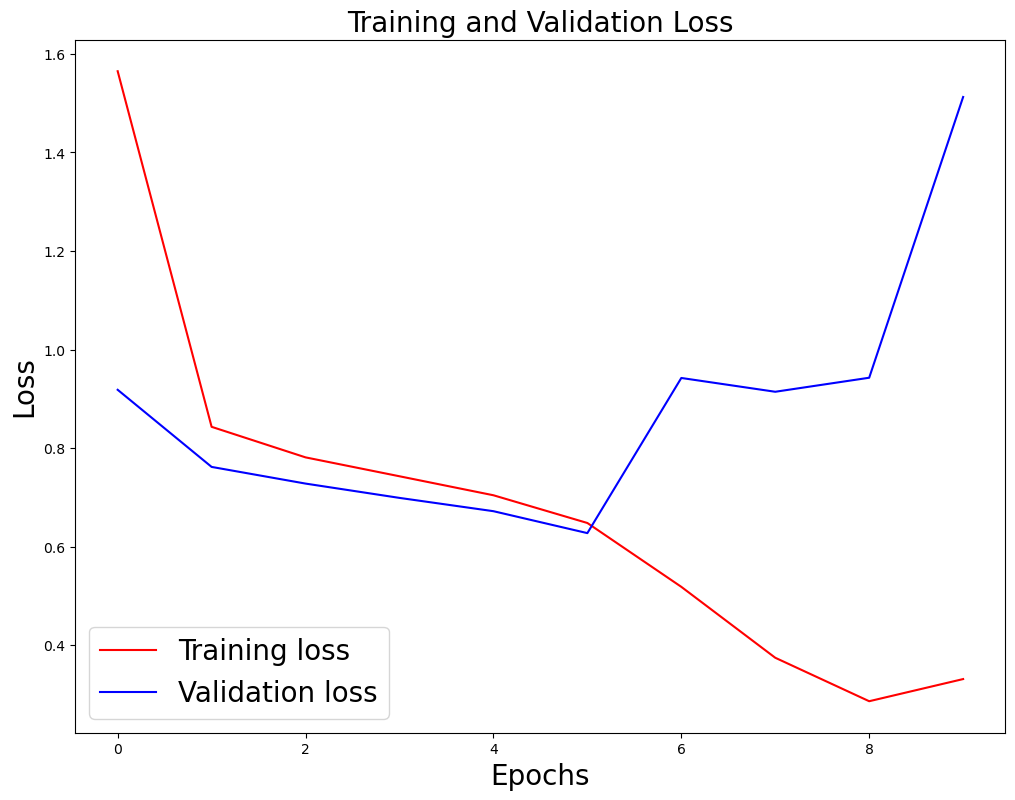

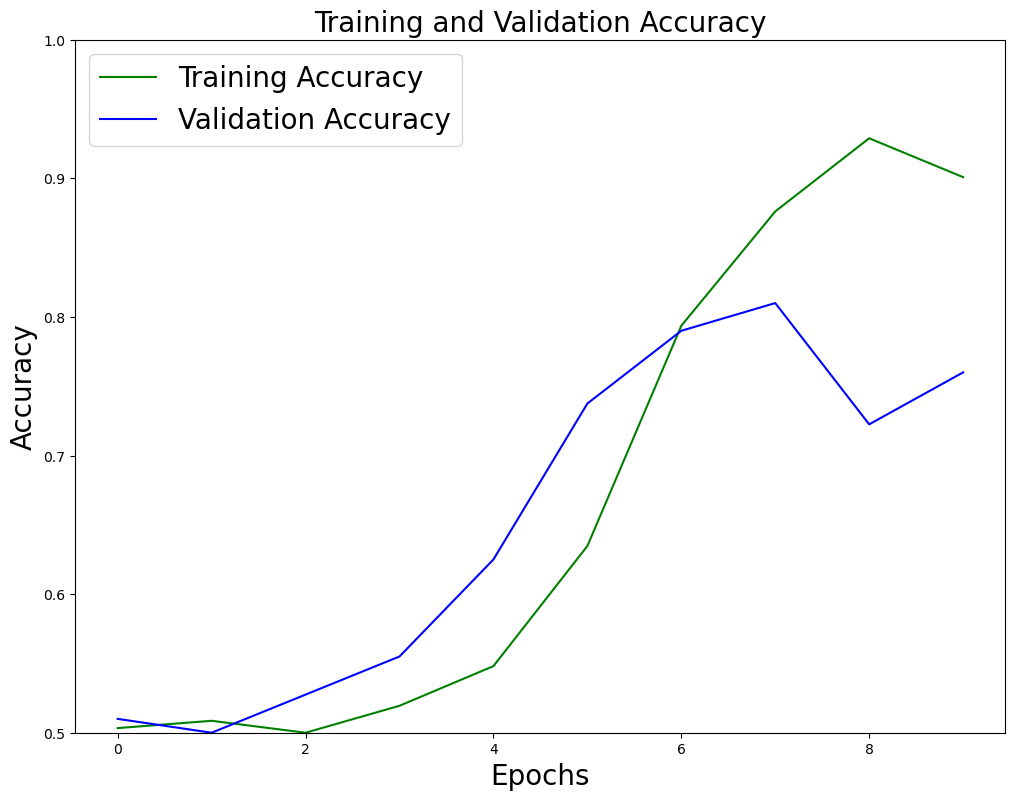

In [134]:
import matplotlib.pyplot as plt

# Assuming `history` is from the trained model
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

# Plotting training and validation loss
plt.figure(figsize=(12, 9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and Validation Loss", size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel("Loss", size=20)
plt.legend(prop={'size': 20})
plt.show()

# Plotting training and validation accuracy
plt.figure(figsize=(12, 9))
plt.plot(epochs, acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title("Training and Validation Accuracy", size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel("Accuracy", size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5, 1))
plt.show()


In [135]:
model.evaluate(x_test,ytest)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.7840 - loss: 1.3264


[1.3890191316604614, 0.7789999842643738]

In [136]:
pred=model.predict(x_test)
binary_predictions=[]
for i in pred:
    if i>=0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)
        

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step


In [137]:
binary_predictions

[1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,


In [138]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy on testing set:",accuracy_score(binary_predictions,ytest))
print("Precision on testing set:",precision_score(binary_predictions,ytest))
print("Recall on testing set:",recall_score(binary_predictions,ytest))



Accuracy on testing set: 0.779
Precision on testing set: 0.8925143953934741
Recall on testing set: 0.7380952380952381


In [139]:
predicts=["Negative numbers are not available to convey how bad this movie is! Wooden acting coupled with a story line that has been rehashed dozens of times. Everyone in this movie should attend Overactors Anonymous. You would think an original story could evolve from the general concept. Young men at a prep school are tying to come to grips with the Pearl Harbor bombing. It does raise interesting questions, but the manner in which they are conveyed make it more of a joke. The typical characters were present including the zealous jock and nerd (glasses included). I could not have been more uninterested in the wooden dialog and cliché characters. Upon the completion of the movie, I had to throw the DVD in the trash. Stay far away from this dud! You won't get the 90 minutes of your life back! "]

In [140]:
predicts=normalize(predicts)

In [183]:
predicts=tokenizer.texts_to_sequences(predicts)

In [185]:
predicts=tf.keras.preprocessing.sequence.pad_sequences(predicts,padding='post',maxlen=256)

In [187]:
print(predicts)

[[1560 1799   26   24 1177    5 3310   84   74   11   18    6 1654  110
  7557   16    2   64  320   12   48   77 3170    4  211  295    8   11
    18  142 9230 8773   22   59  102   35  231   64   97 8720   38    1
   772 1131  199  397   32    2  391   26    5  218    5 7696   16    1
  3892 4966 9488    9  129 3478  206 1060   19    1 1254    8   62   34
    26 7364   98    9   54    4    2  990    1  793  103   71  828  538
     1    3 3759 4407 2521   10   97   24   28   77   54    8    1 1654
   701    3 1565  103  640    1 9489    4    1   18   10   66    5 1118
     1  267    8    1 1260  896  213  235   38   11 4389   22  413   23
    81    1 1255  226    4  131  114  148    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0   

In [189]:
pred=model.predict(predicts)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


In [191]:
pred

array([[0.11563561]], dtype=float32)

In [193]:
if pred>=0.5:
    pred=1
else:
    pred=0

In [195]:
pred

0